In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

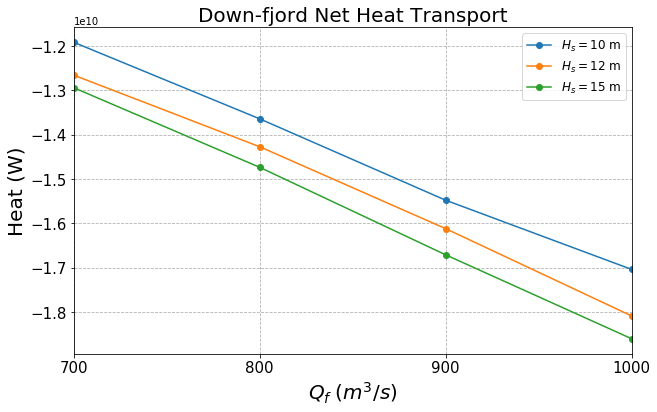

In [9]:
Hs = [10, 12, 15] # Sill depth
Qf = np.linspace(700, 1000, 4) # Freshwater discharge

Cp = 4220  # Specific heat content J/kg/C
rho = 1025 # Density

# Grid areas
Area = np.empty([50, 9])
Area[:10,:] = 100
Area[10:20,:] = 200
Area[20:30,:] = 300
Area[30:40,:] = 800
Area[40:,:] = 1600

# Two-panel plot
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
#ax1.set_ylabel('$V_{in} \; (m^3/s)$',size=15)
#ax1.set_xlabel('$Q_{f} \; (m^3/s)$',size=15)
#ax1.set_xlim([700, 1000])
#ax1.set_xticks(Qf)
#ax2.set_ylabel('$H_{in} \; (W)$',size=15)
#ax2.set_xlim([700, 1000])
#ax2.set_xlabel('$Q_f \; (m^3/s)$',size=15)
#ax2.set_xticks(Qf)

fig, ax =plt.subplots(figsize=(10,6))
ax.set_xlim([700, 1000])
ax.set_xticks(Qf)
plt.grid(linestyle='--')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('$Q_f\;(m^3/s)$', size=20)
plt.ylabel('Heat (W)', size=20)
plt.title('Down-fjord Net Heat Transport', size=20)


for s in range(len(Hs)):
    files = sorted(glob.glob('/Users/weiyangbao/Desktop/State/' + str(format(Hs[s],'03d')) + '/state*.nc'))
    nH1 = np.empty(len(files))
    nH2 = np.empty(len(files))
    for i in range(len(files)):
        state0 = xr.open_dataset(files[i])
        t0 = 0 # Start from day 30
        tn = len(state0.T) # End day
        state = state0.isel(Y=range(1,10), T=range(t0,tn)) # Remove the boundary walls in y direction
        u0 = state.U.data.mean(0)
        u = (u0[:, :, 1:] + u0[:, :, :-1]) / 2
        u_s1 = u[:,:,1] # Along-fjord velocity at xloc
        T_s1 = state.Temp.isel(X=1).data.mean(0) # Potential temperature at xloc
        u_s2 = u[:,:,28]
        T_s2 = state.Temp.isel(X=28).data.mean(0)
        
        Hex1 = u_s1 * Area * (T_s1-9) * Cp * rho # Heat transport
        Hex2 = u_s2 * Area * (T_s2-9) * Cp * rho

        nH1[i] = Hex1.sum()  # Net heat transport at section 1
        nH2[i] = Hex2.sum()  # Net heat transport at section 2

    plt.plot(Qf,nH2-nH1,'o-', lw=1.5, label='$H_s=$' + str(Hs[s]) +' m')
    plt.legend(loc='best', fontsize=12)
    
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Transport/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig.savefig(fig_path + '/DeltaSub.png', dpi = 150, bbox_inches='tight')